<a href="https://colab.research.google.com/github/sou-06/Visualize_RTools_For_Omics/blob/main/GO_DAVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリのインストールとインポート。インストールされていなければ自動でインストールする。

時間がかかる。10分ぐらい。

自分のパソコンのRで実行する場合は、セル内のコードをコピーしてRのコンソールにそのまま張り付けていけば使える。

In [ ]:
libs <- c( "tidyplots", "export", "svglite")
for(lib in libs) {
  if(!require(lib, character.only = T)) {
      install.packages(lib, dependencies = TRUE,  repos = "cloud.r-project.org", Ncpus = 4)
      require(lib, character.only = T)
    }
}

←フォルダマークを押して、DAVIDから出力されたCSVファイルをドラックアンドドロップ

Functional Annotation ChartからCSVをエクスポートする。DAVIDはよく形式が変わるため、エラーになったら表のヘッターを確認。

↓次のマスのファイル名の部分をアップロードしたファイル名に書き換える。

In [12]:
df = read.csv("DAVIDChartReport_List_1_2025-11-25.csv") # ここのファイル名は、アップロードしたものに書き換える。

In [13]:
df

Category,Term,Genes,Count,List.Total,Pop.Hits,Pop.Total,P.Value,Benjamini,Fold.Enrichment,Bonferroni,FDR,Fisher.Exact
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GOTERM_BP_DIRECT,response to water deprivation,4.56%,73,1127,386,22918,5.10e-23,5.86e-20,3.85,5.86e-20,5.62e-20,1.14e-23
GOTERM_CC_DIRECT,cytosol,14.62%,234,1583,2486,28749,2.10e-16,4.26e-14,1.71,4.51e-14,3.80e-14,1.66e-16
GOTERM_CC_DIRECT,plasma membrane,17.74%,284,1583,3271,28749,2.38e-15,2.42e-13,1.58,4.73e-13,2.15e-13,1.42e-15
GOTERM_BP_DIRECT,response to salt stress,3.87%,62,1127,407,22918,6.73e-15,2.59e-12,3.10,7.78e-12,2.48e-12,1.95e-15
GOTERM_BP_DIRECT,response to cold,3.75%,60,1127,385,22918,6.76e-15,2.59e-12,3.17,7.78e-12,2.48e-12,1.96e-15
GOTERM_CC_DIRECT,plant-type vacuole,5.93%,95,1583,749,28749,6.91e-14,4.68e-12,2.30,1.40e-11,4.17e-12,2.73e-14
GOTERM_BP_DIRECT,response to abscisic acid,4.00%,64,1127,466,22918,3.01e-13,8.64e-11,2.79,3.46e-10,8.28e-11,9.81e-14
GOTERM_CC_DIRECT,membrane,26.17%,419,1583,5622,28749,5.05e-12,2.56e-10,1.35,1.02e-09,2.28e-10,3.71e-12
KEGG_PATHWAY,Metabolic pathways,13.87%,222,367,2414,5592,5.73e-12,6.82e-10,1.40,6.82e-10,5.96e-10,3.96e-12


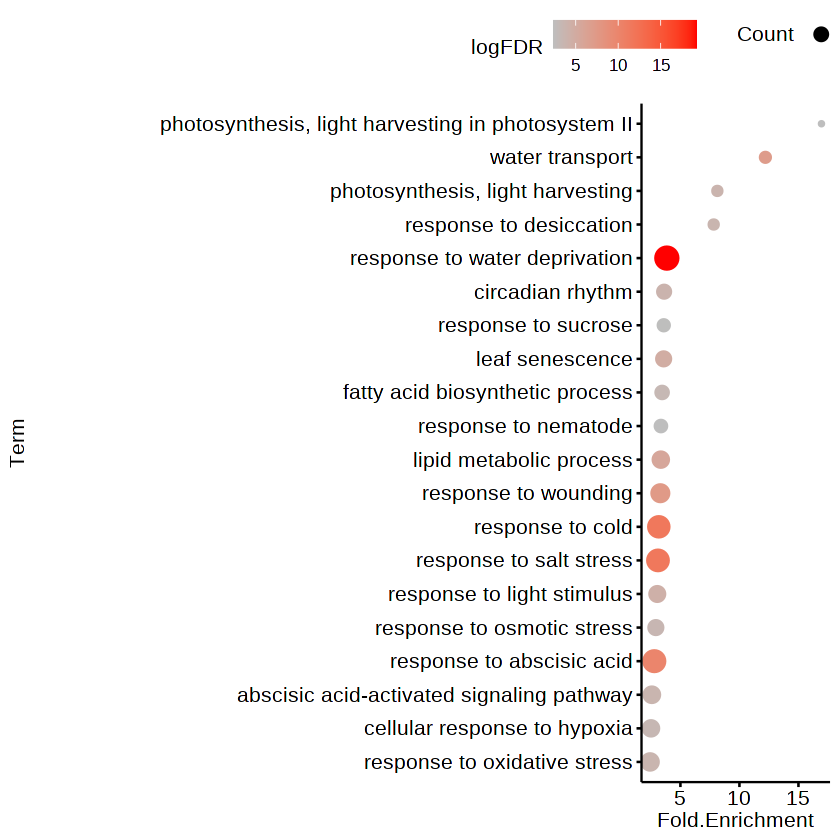

In [24]:
library(ggpubr)
df$logFDR = -log10(df$FDR)
df = df[df$Category == "GOTERM_BP_DIRECT",] # Biological prosessのみにしている。ほかのも見たいときはこの行の行頭に#を置いて。あらかじめエクセル等でフィルターしてもよい。
if (nrow(df) > 20) df = df[1:20, ] #数が多いときは、20個までに制限

plt = ggdotchart(df, x = "Term", y = "Fold.Enrichment",
           color = "logFDR",
           sorting = "descending",
           rotate = TRUE,
           dot.size = "Count",
           ggtheme = theme_pubr()
           ) +
  ggplot2::scale_color_gradientn(colors = c("gray", "red"))
plt

In [ ]:
graph2ppt(plt, "go.pptx")

svglite("go.svg", width = 6, height = 9)
plt
dev.off()